**TRABAJO FINAL DATA SCIENCE - CODERHOUSE - COMISIÓN 46310**- **PERETTI NADIA**

**Profesor:** Fernando Carabedo

**Tutor:** Guillermo Montero


#**PRESENTACIÓN DEL PROBLEMA**

Calificaciones de más de 2500 barras de chocolate de todo el mundo.Se centra en el chocolate negro natural con el objetivo de apreciar los sabores del cacao cuando se convierte en chocolate. Las calificaciones no reflejan beneficios de salud, misiones sociales o estatus orgánico. Cada chocolate se evalúa a partir de una combinación de cualidades objetivas e interpretación subjetiva. Una calificación aquí solo representa una experiencia con una barra de un lote. Los números de lote, las añadas y las fechas de revisión se incluyen en la base de datos cuando se conocen. Sistema de calificación de sabores de cacao: 4.0 - 5.0 = Sobresaliente 3.5 - 3.9 = Altamente recomendado 3.0 - 3.49 = Recomendado 2.0 - 2.9 = Decepcionante 1.0 - 1.9 = Desagradable.


**DATASET ELEGIDO**

https://www.kaggle.com/datasets/evangower/chocolate-bar-ratings?select=chocolate_bars.csv.

Se eligió este Dataset porque:

Presenta un tamaño adecuado (filas y columnas) y además me resultó atractivo por la similitud con un emprendimiento particular.




#**OBJETIVO DE LA INVESTIGACIÓN**
Me interesa porque es información útil para un emprendimiento y particularmente para Predecir el Rating, poder construir un modelo para predecir el rating de una barra de chocolate en función de características como el porcentaje de cacao, ya que es muy importante en la producción del mismo el porcentaje utilizado. Es decir me interesa entender qué porcentaje de cacao es el mejor rankeado ya que es muy difícil lograr mayor pureza de cacao (mayores porcentajes de cacao). También podría ser de utilidad analizar los ingredientes utilizados y como afectan en el rating. Poder analizar el lugar de orígen y cómo se posicionan también es muy útil. En conclusión poder armar un modelo para predecir el ranking de ventas de una barra de chocolate en función de otras variables presentes es sumamente interesante.



---


🍫🍫**Importación de la Librerías y del Dataset:**🍫🍫


---



In [1]:
import pandas as pd
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
urlcero='https://raw.githubusercontent.com/NJPeretti/CODER/main/chocolate_bars.csv'

In [3]:
df = pd.read_csv(urlcero)

In [4]:
df

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25




---



🍫🍫**Introducción y Definicición de las Variables**🍫🍫


---



In [5]:
df.dtypes

id                    int64
manufacturer         object
company_location     object
year_reviewed         int64
bean_origin          object
bar_name             object
cocoa_percent       float64
num_ingredients     float64
ingredients          object
review               object
rating              float64
dtype: object

id : es un identificador numérico del rgistro   

manufacturer : Nombre de la barra de chocolate

company_location :País de origen de los granos de cacao

year_reviewed : El año de revisión

bean_origin : Ubicación del fabricante

bar_name : Nombre del fabricante de la barra de chocolate

cocoa_percent : Contenido de cacao de la barra de chocolate (%)

num_ingredients : Número de ingredientes en la barra de chocolate.

ingredients : Ingredientes utilizados (Frijoles), S (Azúcar), S* (Edulcorante distinto del azúcar o de remolacha), C (Manteca de cacao), (V) Vainilla, (L) Lecitina, Sa (Sal)

review : Resumen de las características más recordadas de la barra de chocolate

rating : Sistema de calificación de sabores de cacao:
4.0 - 5.0 = Sobresaliente
3.5 - 3.9 = Altamente recomendado
3.0 - 3.49 = Recomendado
2.0 - 2.9 = Decepcionante
1.0 - 1.9 = Desagradable





---



#🍫🍫**Análisis Exploratorio de Datos (EDA)**🍫🍫



---



EDA

In [6]:
df.shape

(2530, 11)

In [7]:
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [8]:
df.columns

Index(['id', 'manufacturer', 'company_location', 'year_reviewed',
       'bean_origin', 'bar_name', 'cocoa_percent', 'num_ingredients',
       'ingredients', 'review', 'rating'],
      dtype='object')

In [9]:
df.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,2530.000000,2530.000000,2530.000000,2443.000000,2530.000000
mean,1429.800791,2014.374308,71.639723,3.041343,3.196344
std,757.648556,3.968267,5.616724,0.913728,0.445321
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,802.000000,2012.000000,70.000000,2.000000,3.000000
50%,1454.000000,2015.000000,70.000000,3.000000,3.250000
75%,2079.000000,2018.000000,74.000000,4.000000,3.500000
max,2712.000000,2021.000000,100.000000,6.000000,4.000000


Analizo si mi data set tiene valores nulos:

In [10]:
df.isnull().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

Efectivamente si hay nulos, por loq ue a num_ingredients los nulos los reemplazo por su media y a ingredients primero debo convertir la variable categórica a numérica y luego definir si la elimino o no:

In [11]:
df.num_ingredients=df.num_ingredients.fillna(df.num_ingredients.median())

In [12]:
df

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


In [13]:
df.describe

<bound method NDFrame.describe of         id manufacturer company_location  year_reviewed         bean_origin  \
0     2454         5150           U.S.A.           2019            Tanzania   
1     2458         5150           U.S.A.           2019  Dominican Republic   
2     2454         5150           U.S.A.           2019          Madagascar   
3     2542         5150           U.S.A.           2021                Fiji   
4     2546         5150           U.S.A.           2021           Venezuela   
...    ...          ...              ...            ...                 ...   
2525  1205       Zotter          Austria           2014               Blend   
2526  1996       Zotter          Austria           2017            Colombia   
2527  2036       Zotter          Austria           2018               Blend   
2528  2170       Zotter          Austria           2018               Congo   
2529  2170       Zotter          Austria           2018              Belize   

                             bar_name  cocoa_percent  num_ingredients  \
0               Kokoa Kamili, batch 1           76.0              3.0   
1                     Zorzal, batch 1           76.0              3.0   
2              Bejofo Estate, batch 1           76.0              3.0   
3               Matasawalevu, batch 1           68.0              3.0   
4               Sur del Lago, batch 1           72.0              3.0   
...                               ...            ...              ...   
2525                              Raw           80.0              4.0   
2526                 APROCAFA, Acandi           75.0              3.0   
2527  Dry Aged, 30 yr Anniversary bar           75.0              3.0   
2528            Mountains of the Moon           70.0              3.0   
2529                         Maya Mtn           72.0              3.0   

     ingredients                             review  rating  
0          B,S,C          rich cocoa, fatty, bready    3.25  
1          B,S,C             cocoa, vegetal, savory    3.50  
2          B,S,C       cocoa, blackberry, full body    3.75  
3          B,S,C                chewy, off, rubbery    3.00  
4          B,S,C  fatty, earthy, moss, nutty,chalky    3.00  
...          ...                                ...     ...  
2525   B,S*,C,Sa             waxy, cloying, vegetal    2.75  
2526       B,S,C          strong nutty, marshmallow    3.75  
2527       B,S,C               fatty, earthy, cocoa    3.00  
2528       B,S,C       fatty, mild nuts, mild fruit    3.25  
2529       B,S,C          muted, roasty, accessible    3.50  

[2530 rows x 11 columns]>

In [14]:
df.dropna()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


Corroboro que no quedan nulos en num_ingredients:

In [15]:
df.isnull().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients      0
ingredients         87
review               0
rating               0
dtype: int64

Ahora elimino los nulos de ingredientes:

Como veo que no es tan relevante para el análisis , no son muchas las que tienen ceros, las elimino:

In [16]:
df.shape

(2530, 11)

In [17]:
df=df.dropna()

In [18]:
df=df.reset_index()

In [19]:
df.shape

(2443, 12)

Corrobo que eliminé las columnas con nulos:

In [20]:
df.isnull().sum()

index               0
id                  0
manufacturer        0
company_location    0
year_reviewed       0
bean_origin         0
bar_name            0
cocoa_percent       0
num_ingredients     0
ingredients         0
review              0
rating              0
dtype: int64

Ahora analizo las variables:

In [21]:
paises=df.company_location.value_counts()

In [22]:
paises

U.S.A.        1118
Canada         174
France         168
U.K.           124
Italy           72
              ... 
Martinique       1
Ghana            1
Wales            1
Suriname         1
Russia           1
Name: company_location, Length: 67, dtype: int64

In [23]:
type(paises)

pandas.core.series.Series

In [24]:
paises.index

Index(['U.S.A.', 'Canada', 'France', 'U.K.', 'Italy', 'Belgium', 'Australia',
       'Ecuador', 'Switzerland', 'Germany', 'Spain', 'Denmark', 'Venezuela',
       'Austria', 'Colombia', 'Hungary', 'New Zealand', 'Japan', 'Brazil',
       'Peru', 'Vietnam', 'Singapore', 'Madagascar', 'Amsterdam', 'Scotland',
       'Dominican Republic', 'Mexico', 'Guatemala', 'Taiwan', 'Nicaragua',
       'Israel', 'Costa Rica', 'South Korea', 'Netherlands', 'Lithuania',
       'Poland', 'Sweden', 'Honduras', 'U.A.E.', 'Ireland', 'Philippines',
       'Thailand', 'South Africa', 'Sao Tome & Principe', 'Fiji', 'Iceland',
       'Argentina', 'Puerto Rico', 'Vanuatu', 'Czech Republic', 'El Salvador',
       'Grenada', 'Norway', 'Portugal', 'St. Lucia', 'Sao Tome', 'Malaysia',
       'Finland', 'India', 'Bolivia', 'Chile', 'St.Vincent-Grenadines',
       'Martinique', 'Ghana', 'Wales', 'Suriname', 'Russia'],
      dtype='object')

In [25]:
paises.values

array([1118,  174,  168,  124,   72,   60,   51,   51,   44,   39,   35,
         31,   31,   30,   28,   26,   26,   26,   24,   20,   16,   15,
         13,   12,   11,   11,   10,   10,   10,   10,    9,    9,    8,
          8,    8,    7,    6,    6,    5,    5,    5,    5,    4,    4,
          4,    4,    4,    4,    4,    3,    3,    3,    3,    3,    3,
          3,    3,    2,    2,    2,    2,    1,    1,    1,    1,    1,
          1])

**GRÁFICO 1 CON MATPLOTLIB: Histograma 10 países mejor rankeados:**
Filtro 10 países porque todos son muchos.

Text(0.5, 1.0, 'Top 10 de Países con más Barras de Chocolate')

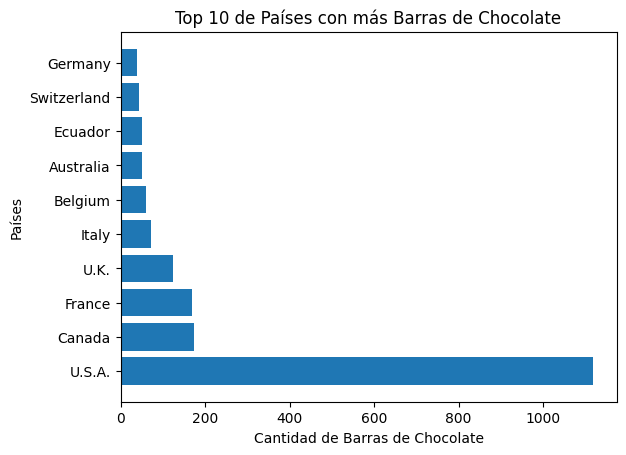

In [26]:
top_10_paises = paises.sort_values(ascending=False).head(10)  # Ordena y obtén los 10 principales países
plt.barh(y=top_10_paises.index, width=top_10_paises.values)
plt.xlabel('Cantidad de Barras de Chocolate')
plt.ylabel('Países')
plt.title('Top 10 de Países con más Barras de Chocolate')

**GRÁFICO 2 CON MATPLOTLIB: Histograma por cantidad o porcentaje de chocolate de cada barra:**
Dejo este gráfico porque es más representativo de lo que necesito saber o predecir (la cantidad de barras por porcentaje de cacao en ellas).

In [27]:
porcentaje=df.cocoa_percent.value_counts()

In [28]:
porcentaje.values

array([1014,  307,  287,   85,   82,   70,   67,   66,   44,   43,   41,
         38,   35,   34,   31,   27,   21,   17,   16,   15,   13,   12,
          8,    8,    7,    7,    7,    6,    5,    4,    4,    3,    2,
          2,    2,    2,    2,    1,    1,    1,    1,    1,    1,    1,
          1,    1])

Text(0, 0.5, 'Barras')

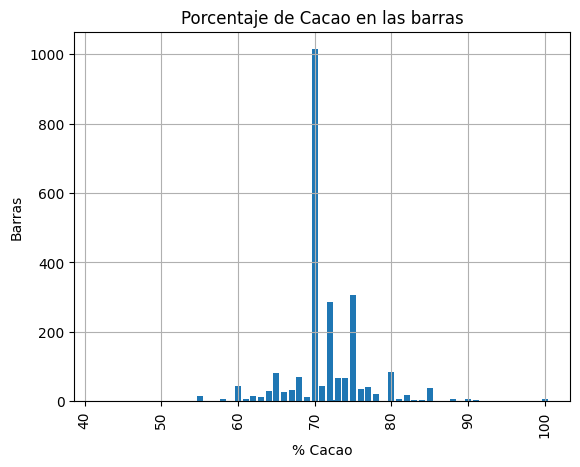

In [29]:
plt.bar(x=porcentaje.index,height=porcentaje.values)

plt.xticks(rotation='vertical');
plt.grid(True)
plt.title('Porcentaje de Cacao en las barras')
plt.xlabel('% Cacao')
plt.ylabel('Barras')


**GRÁFICO 3 CON MATPLOTLIB:** rating por país

In [30]:
raking=df.rating.value_counts()

Text(0, 0.5, 'Cantidad barras')

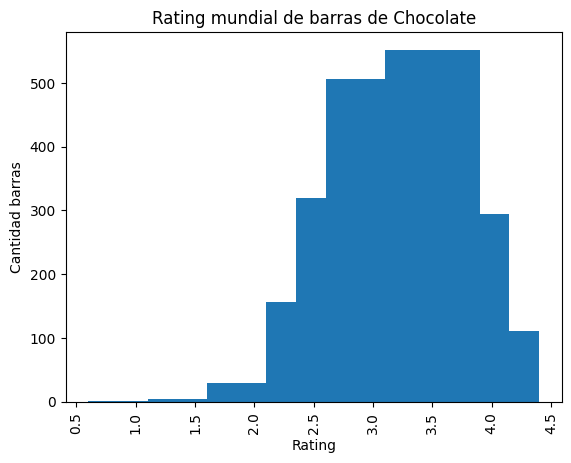

In [31]:
plt.bar(x=raking.index,height=raking.values)

plt.xticks(rotation='vertical');
plt.title('Rating mundial de barras de Chocolate')
plt.xlabel('Rating')
plt.ylabel('Cantidad barras')

**GRÁFICO 4 CON MATPLOTLIB: gráficos comparativos de los rating de Argentina, USA y Canada.**

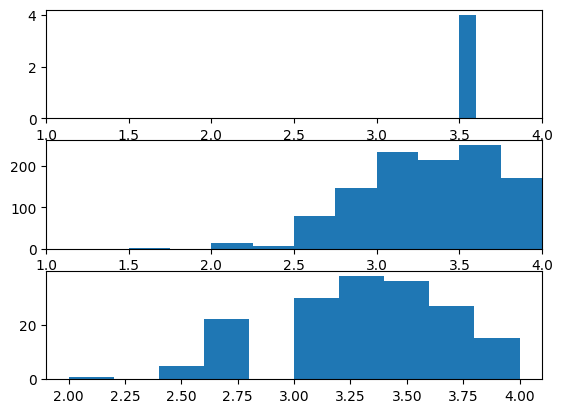

In [32]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(3, 1, 1)
plt.hist(df[df.company_location=='Argentina'].rating)
plt.xlim([1,4])
plt.subplot(3, 1, 2)
plt.hist(df[df.company_location=='U.S.A.'].rating)
plt.xlim([1,4])
plt.subplot(3, 1, 3)
plt.hist(df[df.company_location=='Canada'].rating)
plt.show()

**UTILIZO LAS HERRAMIENTAS PARA AGRUPAR EN ESTE CASO ME INTERESA  filtrar y comparar por país el rating:**

In [33]:
df.groupby('company_location')['rating'].mean()

company_location
Amsterdam    3.312500
Argentina    3.500000
Australia    3.367647
Austria      3.258333
Belgium      3.179167
               ...   
U.S.A.       3.195662
Vanuatu      2.750000
Venezuela    3.112903
Vietnam      3.359375
Wales        2.750000
Name: rating, Length: 67, dtype: float64

In [34]:
df.groupby(['company_location','cocoa_percent'])['rating'].mean()

company_location  cocoa_percent
Amsterdam         66.0             3.25
                  68.0             3.50
                  70.0             3.25
                  75.0             3.25
                  80.0             3.75
                                   ... 
Vietnam           76.0             3.50
                  78.0             3.50
                  80.0             3.00
                  85.0             3.25
Wales             80.0             2.75
Name: rating, Length: 419, dtype: float64

<Axes: >

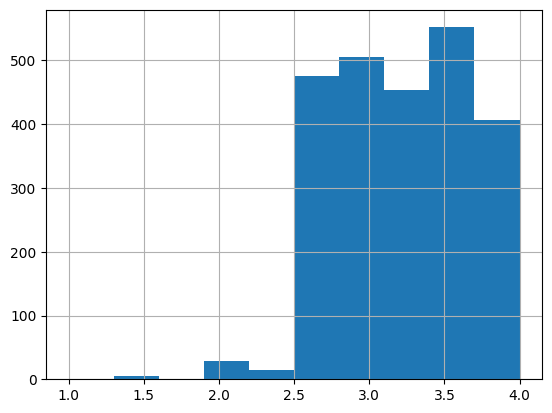

In [35]:
df.rating.hist()



---



**AHORA CON SEABORN:**




**GRÁFICO 1 CON SEABORN: HISTOGRAMA DE RATING**
Rating del total de la muestra de tabletas de chocolate

Text(0.5, 0, 'N de Rating')

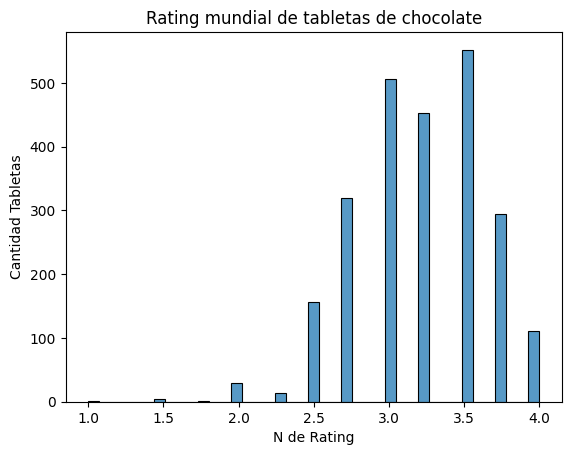

In [36]:
sns.histplot(df,x='rating')
plt.title('Rating mundial de tabletas de chocolate')
plt.ylabel('Cantidad Tabletas')
plt.xlabel('N de Rating')

**GRÁFICO 2 CON SEABORN: Diagrama de caja y bigotes del rating de barras de chocolate:**


<Axes: xlabel='rating'>

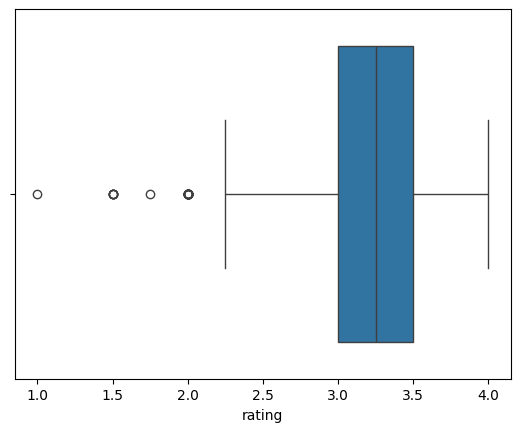

In [37]:
sns.boxplot(data=df,x="rating")

La conclusión de este gráfico sería que el valor mínimo de rating es 1, el máx es 4, que el 25% de los valores valen 3 y el 75% 3.5, la media es 3.19. Hay 4 valores atípicos fuera de los bigotes y muy lejanos a la media.

**GRÁFICO 3 CON SEABORN: BOXPLOT DE % de CACAO por PAÍS**

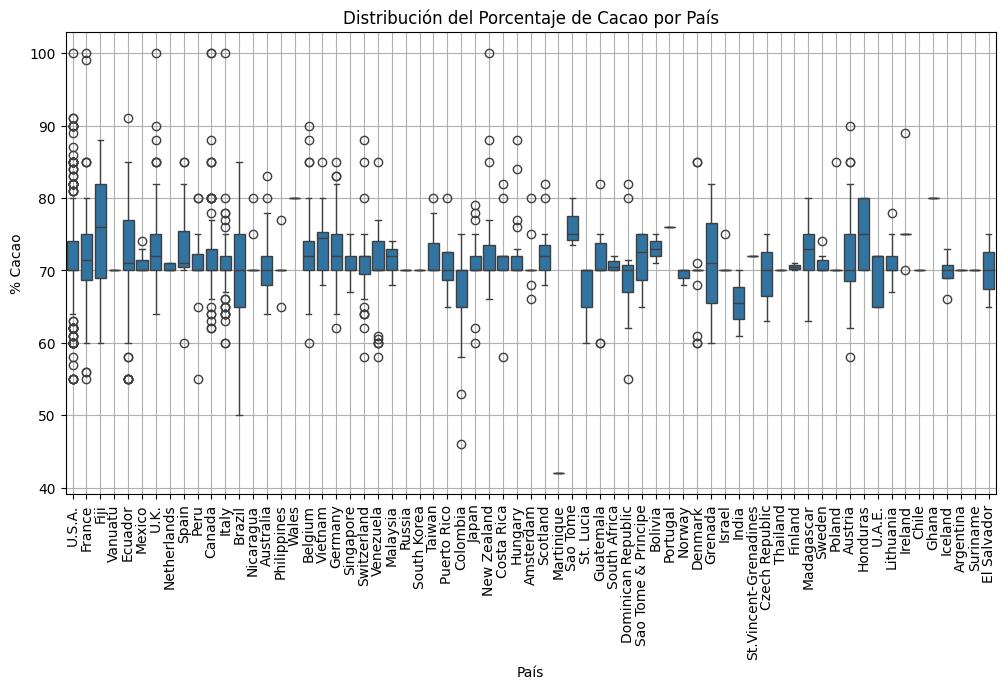

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='company_location', y='cocoa_percent', data= df)
plt.xticks(rotation='vertical')
plt.title('Distribución del Porcentaje de Cacao por País')
plt.xlabel('País')
plt.ylabel('% Cacao')
plt.grid(True)

La conclusión de este gráfico es que la mayoría de los países tienen entre el 65 y 75 % de cacao en sus barras.

Mi conclusión por el momento sería que las barras de chocolate con el 70 % de cacao son las mejor rankeadas (es decir las clasificadas como sobresalientes) a nivel mundial.




---

🍫🍫**Relación entre diferentes variables**🍫🍫



---



**ANÁLISIS UNIVARIADO DEL RATING:**

<Axes: >

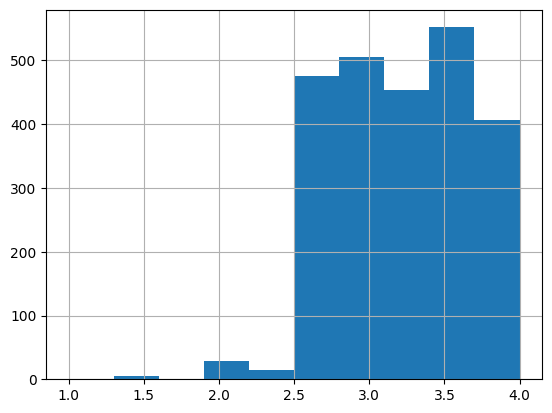

In [39]:
df.rating.hist()





**ANÁLISIS BIVARIADO DEL RATING CON RESPECTO A OTRAS VARIABLES:**





Analizamos la correlación de las variables:

In [40]:
df.corr()

<ipython-input-40-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,index,id,year_reviewed,cocoa_percent,num_ingredients,rating
index,1.000000,0.018603,0.016711,0.037881,0.062557,-0.016032
id,0.018603,1.000000,0.993091,0.047576,-0.356845,0.085569
year_reviewed,0.016711,0.993091,1.000000,0.048043,-0.362956,0.087774
cocoa_percent,0.037881,0.047576,0.048043,1.000000,-0.187468,-0.077173
num_ingredients,0.062557,-0.356845,-0.362956,-0.187468,1.000000,-0.098834
rating,-0.016032,0.085569,0.087774,-0.077173,-0.098834,1.000000


<ipython-input-41-8764e40f9220>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Set1')


<Axes: >

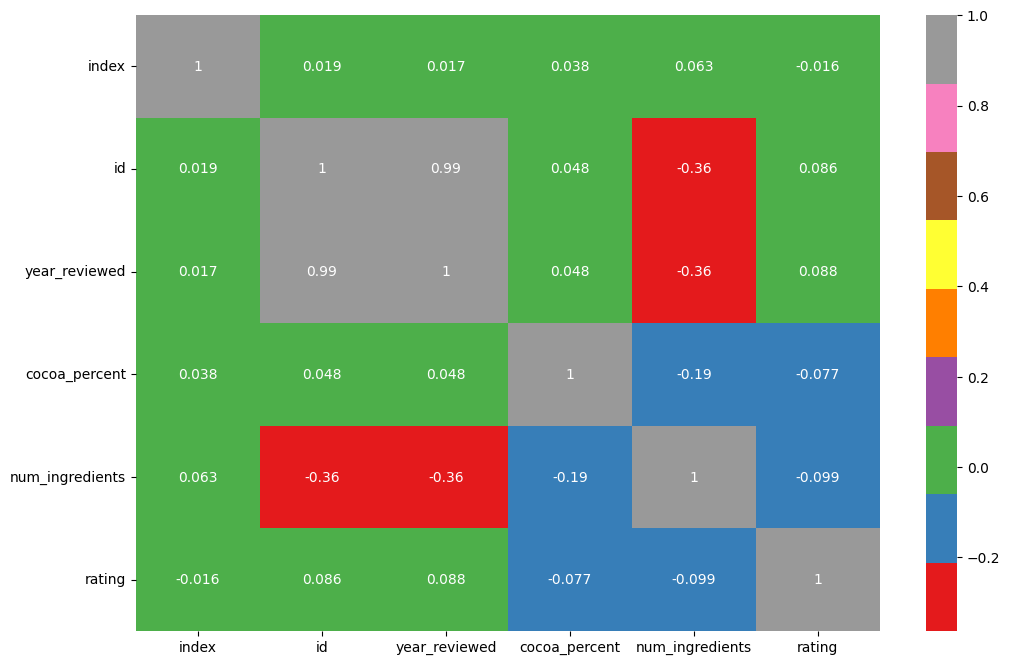

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='Set1')

Lo que observo como conclusión de la matriz de correlación es que la correlación entre variables es baja o débil. Yo definí que mi variable target es rating, es decir que lo que quisiera predecir es el rating de acuerdo a alguna de las otras variables, en ese sentido la que mayor valor tiene es el % de cacao.



---
🍫🍫  **Data Wrangling:**🍫🍫


---






#Data Wrangling

Realizo una tabla multinivel, esta tabla pivot permite agregar una *tercera dimensión* llamada "Clasificación".

Usamos para categorizar la variable *rating*, generando cinco intervalos según el Sistema de calificación de sabores de cacao: 4.0 - 5.0 = Sobresaliente 3.5 - 3.9 = Altamente recomendado 3.0 - 3.49 = Recomendado 2.0 - 2.9 = Decepcionante 1.0 - 1.9 = Desagradable.

In [42]:
df["rating"].describe()

count    2443.00000
mean        3.21009
std         0.42837
min         1.00000
25%         3.00000
50%         3.25000
75%         3.50000
max         4.00000
Name: rating, dtype: float64

In [43]:
df.rating

0       3.25
1       3.50
2       3.75
3       3.00
4       3.00
        ... 
2438    2.75
2439    3.75
2440    3.00
2441    3.25
2442    3.50
Name: rating, Length: 2443, dtype: float64

In [44]:
pd.cut(df.rating, [1.0, 1.9, 2.9, 3.49, 3.9,5],)

0       (2.9, 3.49]
1       (3.49, 3.9]
2       (3.49, 3.9]
3       (2.9, 3.49]
4       (2.9, 3.49]
           ...     
2438     (1.9, 2.9]
2439    (3.49, 3.9]
2440    (2.9, 3.49]
2441    (2.9, 3.49]
2442    (3.49, 3.9]
Name: rating, Length: 2443, dtype: category
Categories (5, interval[float64, right]): [(1.0, 1.9] < (1.9, 2.9] < (2.9, 3.49] < (3.49, 3.9] <
                                           (3.9, 5.0]]

In [45]:
df['çlasificacion']=pd.cut(df.rating, [1.0, 1.9, 2.9, 3.49, 3.9,5],labels=['desagradable','deceptionante','recomendado','altamente recomendado','sobresaliente'])

In [46]:
df

,index,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,çlasificacion
0,0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,recomendado
1,1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,altamente recomendado
2,2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,altamente recomendado
3,3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,recomendado
4,4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,recomendado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75,deceptionante
2439,2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75,altamente recomendado
2440,2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00,recomendado
2441,2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25,recomendado


In [47]:
df.çlasificacion

0                 recomendado
1       altamente recomendado
2       altamente recomendado
3                 recomendado
4                 recomendado
                ...          
2438            deceptionante
2439    altamente recomendado
2440              recomendado
2441              recomendado
2442    altamente recomendado
Name: çlasificacion, Length: 2443, dtype: category
Categories (5, object): ['desagradable' < 'deceptionante' < 'recomendado' < 'altamente recomendado' <
                         'sobresaliente']

In [48]:
df.çlasificacion.dtypes

CategoricalDtype(categories=['desagradable', 'deceptionante', 'recomendado',
                  'altamente recomendado', 'sobresaliente'],
, ordered=True)

<Axes: title={'center': 'Clasificacion de barras de chocolate'}, xlabel='Categoría', ylabel='Cantidad de barras'>

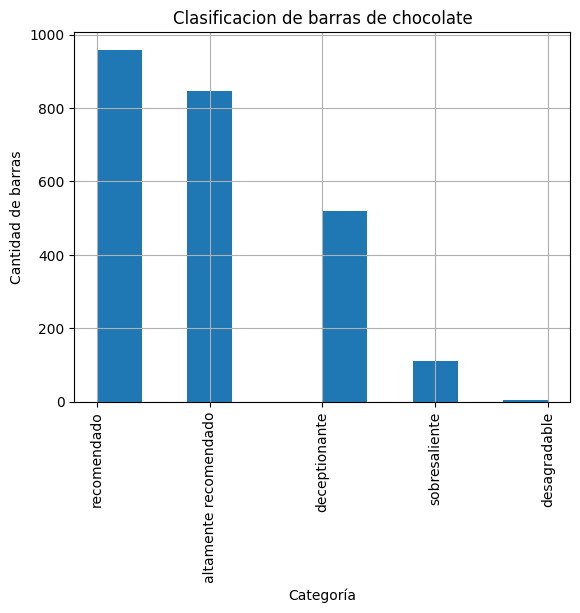

In [49]:
plt.xticks(rotation='vertical')
plt.title('Clasificacion de barras de chocolate')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de barras')
df.çlasificacion.hist()

In [50]:
df.çlasificacion.value_counts()

recomendado              959
altamente recomendado    847
deceptionante            519
sobresaliente            111
desagradable               6
Name: çlasificacion, dtype: int64

In [51]:
df.dtypes

index                  int64
id                     int64
manufacturer          object
company_location      object
year_reviewed          int64
bean_origin           object
bar_name              object
cocoa_percent        float64
num_ingredients      float64
ingredients           object
review                object
rating               float64
çlasificacion       category
dtype: object

<Figure size 768x576 with 0 Axes>

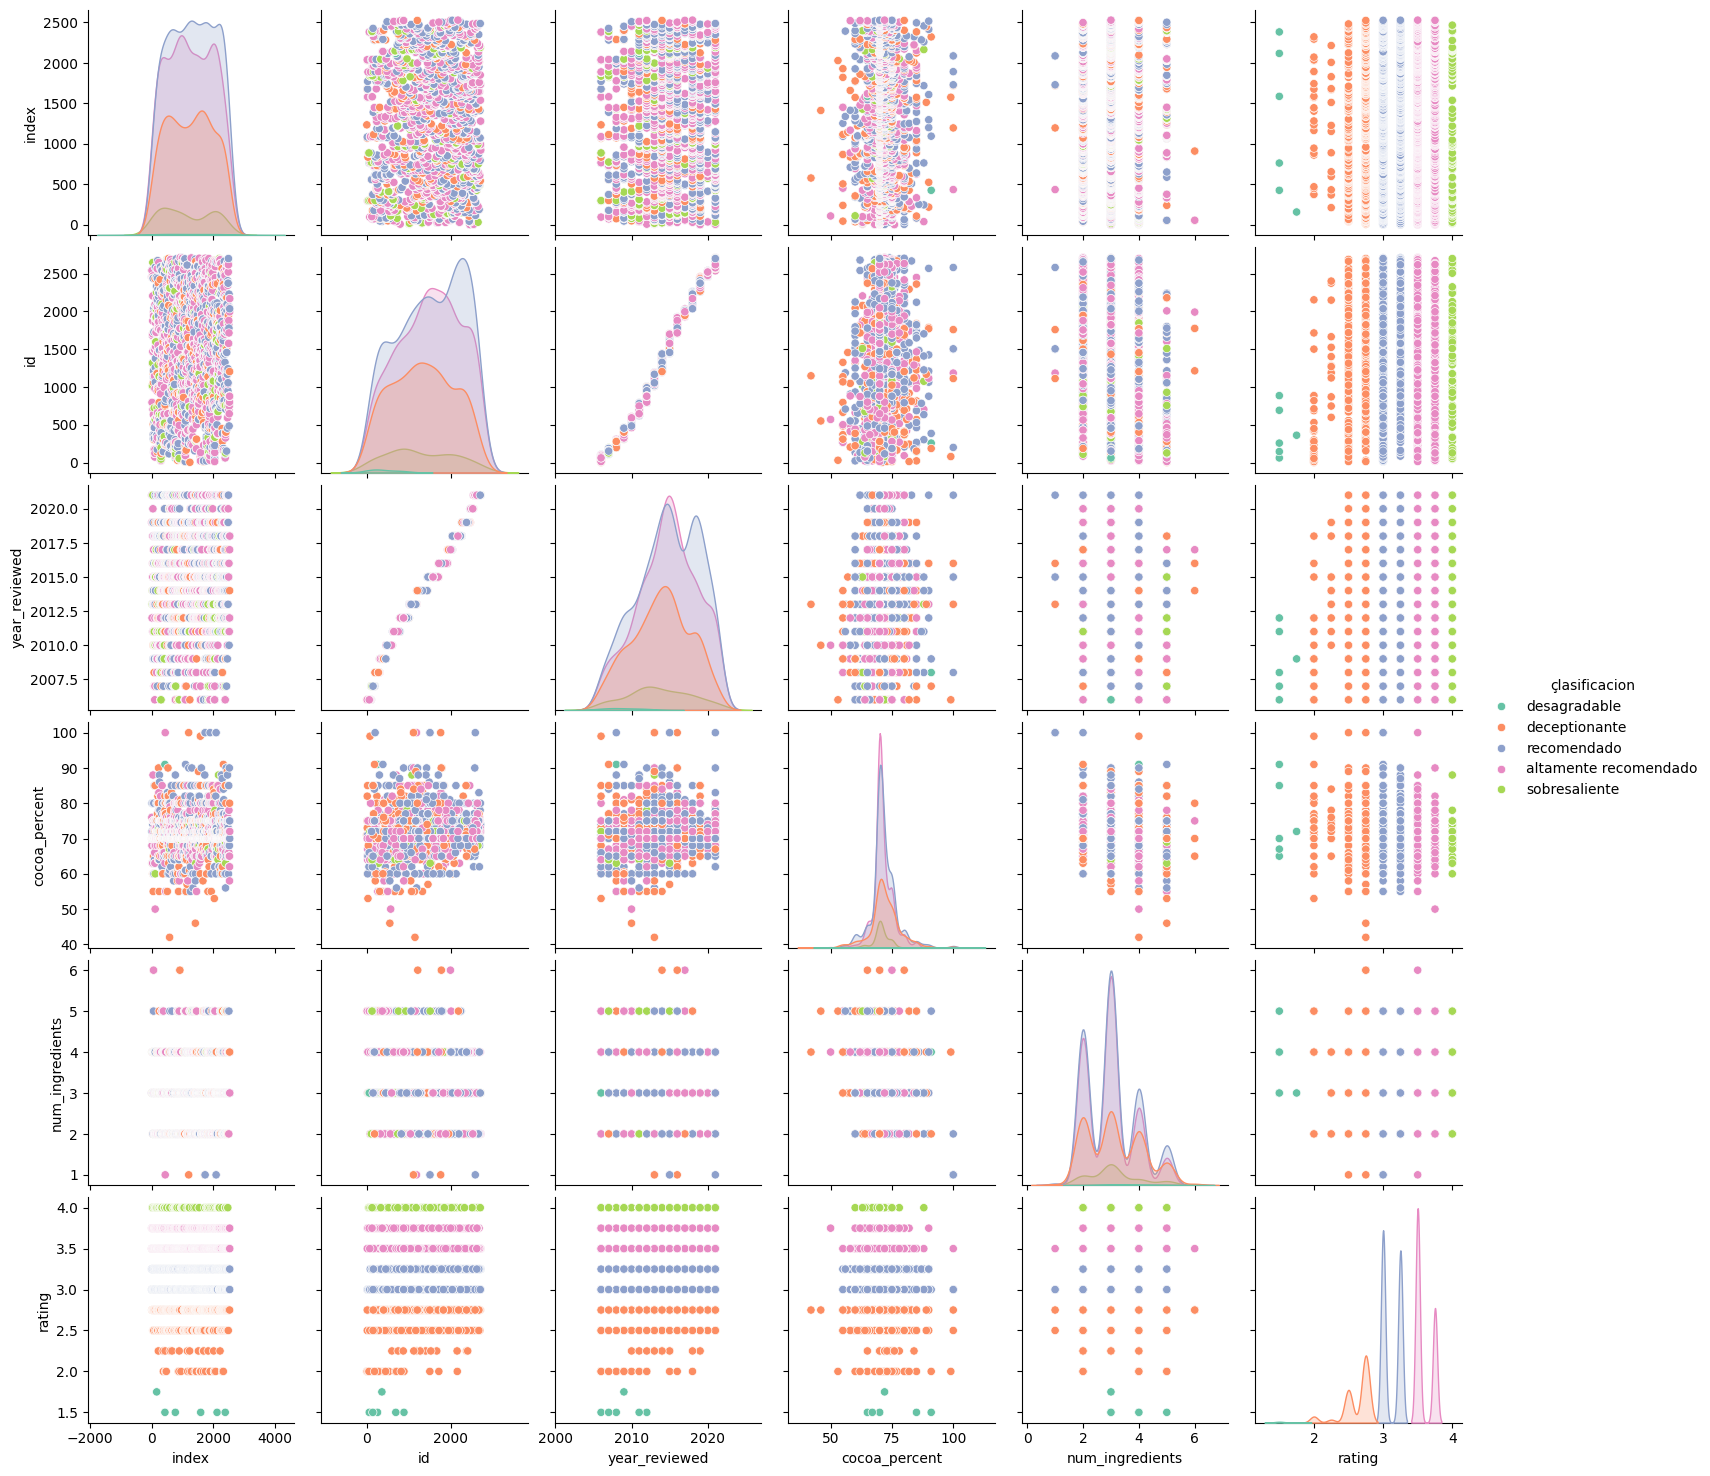

In [52]:
#Crear el Pairplot pero ahora con el atributo hue = 'çlasificacion'. Las leyendas deberán decir: 'Desagradable','Decepcionante', 'Recomendado', 'Altamente Recomendado','Sobresaliente'
plt.figure(dpi = 120)
sns.pairplot(df,hue = 'çlasificacion',palette = 'Set2')
#plt.legend(['Desagradable','Decepcionante', 'Recomendado', 'Altamente Recomendado','Sobresaliente'])
plt.show()

In [53]:
x=df.çlasificacion
x=pd.get_dummies(x,drop_first=True)

In [54]:
x

,deceptionante,recomendado,altamente recomendado,sobresaliente
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
2438,1,0,0,0
2439,0,0,1,0
2440,0,1,0,0
2441,0,1,0,0




---
🍫🍫  **Modelado:**🍫🍫


---






#Modelado


---


**1- Modelo con todas las variables:**


---



Elimino las variables categóricas primero porque vimos que hay:

In [55]:
df_nulos_dummies=pd.get_dummies(df,drop_first=True)

Defino mi target "rating" y el resto es todo x:

In [56]:
X=df_nulos_dummies.drop('rating',axis=True)
y=df_nulos_dummies.rating

In [57]:
# queremos ver como performa el modelo con todas las features
# la manera es testear al modelo en datos con los cuales NO entreno

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [58]:
modelo1=LR()
modelo1.fit(X_train,y_train)

LinearRegression()

In [59]:
#Predigo con el conjunto de prueba
y_pred=modelo1.predict(X_test)

In [60]:
#Evalúo el modelo
mse_test=mean_squared_error(y_test, y_pred)
r2_test= r2_score(y_test, y_pred)

In [61]:
mse_test

0.026636189642697546

In [62]:
r2_test

0.8540866490542562

Ahora con los datos de entrenamiento:

In [63]:
#ahora testeamos el modelo en los datos de entrenamiento
y_train_pred=modelo1.predict(X_train)

In [64]:
#Evalúo el modelo
mse_train=mean_squared_error(y_train, y_train_pred)
r2_train= r2_score(y_train, y_train_pred)

In [65]:
mse_train


1.0686249549034189e-24

In [66]:
r2_train

1.0

Comparo y saco conclusiones:

In [67]:
#Comparo los errores en el conjunto de prueba y de entrenamiento:

In [68]:
if mse_train < mse_test:
  print('El modelo podría estar sobreajustado')
elif mse_train > mse_test:
   print('El modelo podría estar sobreajustado')
else:
  print('El modelo parece tener un ajuste equilibrado')

if r2_train < r2_test:
  print('El modelo podría estar sobreajustado')
elif r2_train > r2_test:
   print('El modelo podría estar sobreajustado')
else:
  print('El modelo parece tener un ajuste equilibrado')

El modelo podría estar sobreajustado
El modelo podría estar sobreajustado


**CONCLUSIÓN del Modelo 1** con todas las variables, presenta OVERFITTING, es decir está sobreajustado, llego a esta conclusión ya que el r2 del conjunto de entrenamiento es 1 y es malo o sea muy bajo el r2 en el conjunto de prueba.
Lo que debo hacer es eliminar variables.


---


**2- Modelo ajustando o reduciendo las variables:**


---



De acuerdo a lo que vi en la Matriz de correlación, la variable que más correlación tenía era "cocoa_percent", así que modelo con esta variable:

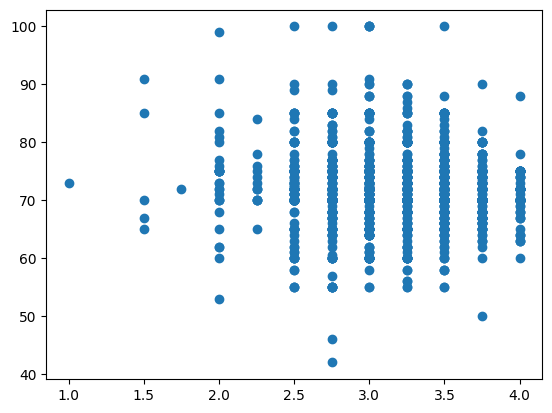

In [69]:
plt.scatter(df.rating,df.cocoa_percent)

In [70]:
X=df[['cocoa_percent']]
y=df.rating

In [71]:
#Separo los datos en conjunto de entrenamiento y prueba
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [72]:
modelo2=LR()
modelo2.fit(X_train,y_train)


LinearRegression()

In [73]:
#Predigo en conjunto de prueba
y_pred=modelo2.predict(X_test)

In [74]:
#Evaluo el rendimiento del modelo2
mse_m2=mean_squared_error(y_test, y_pred)
r2_m2= r2_score(y_test, y_pred)


In [75]:
mse_m2

0.1869658610650951

In [76]:
r2_m2

0.005771706723895154

Pendiente de la recta:

In [77]:
modelo2.coef_

array([-0.00635905])

Ordenada al orígen:

In [78]:
modelo2.intercept_

3.666596280995135

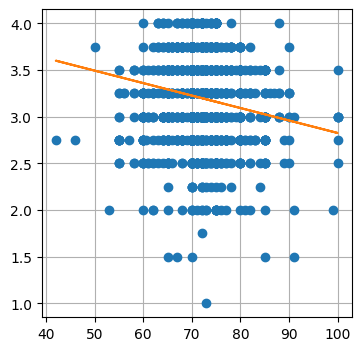

In [79]:
m=-0.01335879
b=4.1605538485145885
y_recta=m*X + b
plt.figure(figsize=[4,4])
plt.plot(df.cocoa_percent,df.rating,'o')
plt.plot(X,y_recta,'-')

plt.grid(True)

**CONCLUSIÓN del Modelo 2** reduciendo la dimensionabilidad, el modelo sigue siendo malo ya que el r2 no es cercano a 1, incluso empeoró al modelo 1.
Entonces ahora me quedan un par de opciones, primer voy a reagrupar variables para ver si mejora la correlación y luego lo que voy a hacer  es utilizar un metodo de seleccion de variables para iterar y ver si consigo un mejor resultado.


---


**3- Agrupado de variables para mejorar correlación:**


---



In [80]:
df_agrup=df.groupby(['company_location','cocoa_percent'])['rating'].mean()

In [81]:
df_agrup

company_location  cocoa_percent
Amsterdam         66.0             3.25
                  68.0             3.50
                  70.0             3.25
                  75.0             3.25
                  80.0             3.75
                                   ... 
Vietnam           76.0             3.50
                  78.0             3.50
                  80.0             3.00
                  85.0             3.25
Wales             80.0             2.75
Name: rating, Length: 419, dtype: float64

In [82]:
ratings_por_año=df.groupby('year_reviewed')['rating'].mean().reset_index()

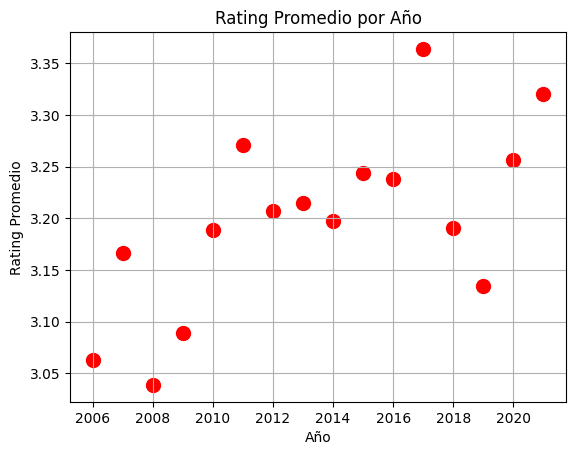

In [83]:
plt.scatter(ratings_por_año['year_reviewed'],ratings_por_año['rating'],color='red',s=100)
plt.xlabel('Año')
plt.ylabel('Rating Promedio')
plt.title('Rating Promedio por Año')
plt.grid(True)
plt.show()

Veo que hay una tendencia, así que modelaré este nuevo agrupamiento.

In [84]:
X=ratings_por_año[['year_reviewed']]
y=ratings_por_año.rating

In [85]:
#Separo los datos en conjunto de entrenamiento y prueba
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [86]:
modelo3=LR()
modelo3.fit(X_train,y_train)


LinearRegression()

In [87]:
#Predigo en conjunto de prueba
y_pred=modelo3.predict(X_test)

In [88]:
#Evaluo el rendimiento del modelo2
mse_m3=mean_squared_error(y_test, y_pred)
r2_m3= r2_score(y_test, y_pred)


In [89]:
mse_m3

0.004849580938940376

In [90]:
r2_m3

0.30163707653220584

Pendiente de la recta:

In [91]:
modelo3.coef_

array([0.01420385])

Ordenada al orígen:

In [92]:
modelo3.intercept_

-25.409034332855544

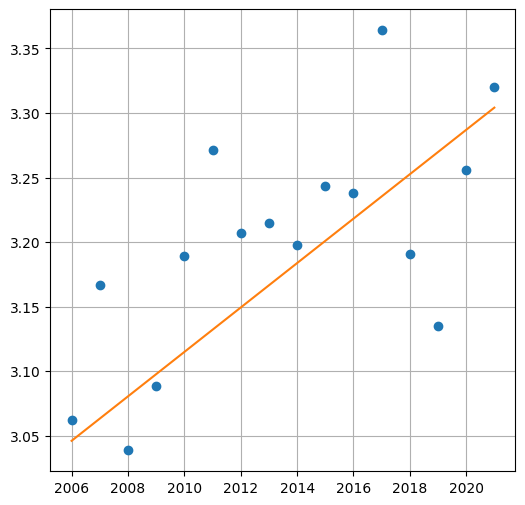

In [93]:
m=0.01720697
b=-31.471148755500668
y_recta=m*X + b
plt.figure(figsize=[6,6])
plt.plot(ratings_por_año.year_reviewed,ratings_por_año.rating,'o')
plt.plot(X,y_recta,'-')

plt.grid(True)

**CONCLUSIÓN del Modelo 3** reduciendo la dimensionabilidad, reagrupando por año el rating de acuerdo al % de cacao veo que mejora mucho el modelo, si bien sigue siendo bajo el r2, es el mejor hasta el momento. Como dije en la conclusión del modelo 1 lo que voy a hacer ahora es iterar para ver si mejora.


---


**4- Aplico Forward Selection:**


---



In [94]:
X=df_nulos_dummies.drop('rating',axis=True)
y=df_nulos_dummies.rating

In [95]:
#Separo los datos en conjunto de entrenamiento y prueba
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [96]:
# Sequential Forward Selection(sfs)
sfs = SFS(LR(),
          k_features=1)

In [97]:
sfs.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 1),
                          scoring='r2')

In [98]:
sfs.k_feature_names_

('çlasificacion_deceptionante',)

In [99]:
X=df['cocoa_percent']
X = pd.get_dummies(X)

In [100]:
#Inicializo en nuevo modelo
modelo4=LR()
modelo4.fit(X_train,y_train)

LinearRegression()

In [101]:
#Predigo en conjunto de prueba
y_pred=modelo4.predict(X_test)

In [102]:
#Evaluo el rendimiento del modelo2
mse_m4=mean_squared_error(y_test, y_pred)
r2_m4= r2_score(y_test, y_pred)


In [103]:
mse_m4

0.028008984344707208

In [104]:
r2_m4

0.851056633853921

***CONCLUSIÓN del Modelo 4 ***empeoró con respecto al anterior modelo, podría seguir iterando con mayor número de variables para ver si mejora.


---


**5- Aplico Árbol Regresión:**


---



**PRIMERO LO APLICO COMO SI FUERA UN PROBLEMA DE REGRESIÓN LINEAL Y LUEGO COMO CLASIFICACIÓN:**

**PRIMERO: COMO REGRESIÓN LINEAL**

In [105]:
df

,index,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,çlasificacion
0,0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,recomendado
1,1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,altamente recomendado
2,2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,altamente recomendado
3,3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,recomendado
4,4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,recomendado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75,deceptionante
2439,2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75,altamente recomendado
2440,2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00,recomendado
2441,2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25,recomendado


In [106]:
df.dtypes

index                  int64
id                     int64
manufacturer          object
company_location      object
year_reviewed          int64
bean_origin           object
bar_name              object
cocoa_percent        float64
num_ingredients      float64
ingredients           object
review                object
rating               float64
çlasificacion       category
dtype: object

In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,2443.0,1262.372493,731.471046,0.0,635.5,1258.00,1895.5,2529.0
id,2443.0,1451.520262,755.521714,5.0,833.0,1474.00,2100.0,2712.0
year_reviewed,2443.0,2014.485878,3.957507,2006.0,2012.0,2015.00,2018.0,2021.0
cocoa_percent,2443.0,71.496725,5.156974,42.0,70.0,70.00,74.0,100.0
num_ingredients,2443.0,3.041343,0.913728,1.0,2.0,3.00,4.0,6.0
rating,2443.0,3.210090,0.428370,1.0,3.0,3.25,3.5,4.0


id : es un identificador numérico del rgistro   

manufacturer : Nombre de la barra de chocolate

company_location :País de origen de los granos de cacao

year_reviewed : El año de revisión

bean_origin : Ubicación del fabricante

bar_name : Nombre del fabricante de la barra de chocolate

cocoa_percent : Contenido de cacao de la barra de chocolate (%)

num_ingredients : Número de ingredientes en la barra de chocolate.

ingredients : Ingredientes utilizados (Frijoles), S (Azúcar), S* (Edulcorante distinto del azúcar o de remolacha), C (Manteca de cacao), (V) Vainilla, (L) Lecitina, Sa (Sal)

review : Resumen de las características más recordadas de la barra de chocolate

rating : Sistema de calificación de sabores de cacao:
4.0 - 5.0 = Sobresaliente
3.5 - 3.9 = Altamente recomendado
3.0 - 3.49 = Recomendado
2.0 - 2.9 = Decepcionante
1.0 - 1.9 = Desagradable



In [108]:
df

,index,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,çlasificacion
0,0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,recomendado
1,1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,altamente recomendado
2,2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,altamente recomendado
3,3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,recomendado
4,4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,recomendado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75,deceptionante
2439,2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75,altamente recomendado
2440,2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00,recomendado
2441,2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25,recomendado


In [109]:

X=df.loc[:,['cocoa_percent','year_reviewed']]
y=df.loc[:,'rating']


<Axes: xlabel='year_reviewed', ylabel='cocoa_percent'>

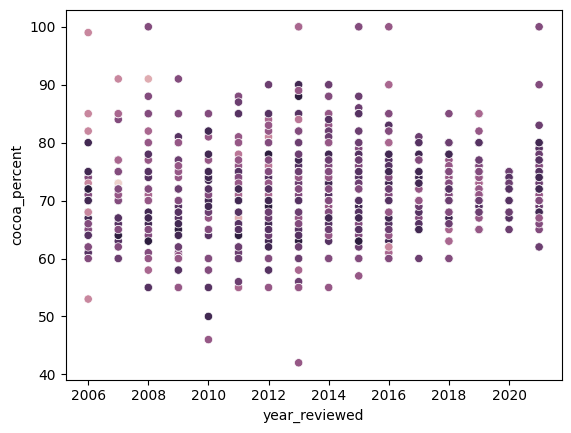

In [110]:
import seaborn as sns


sns.scatterplot(y=df.cocoa_percent,x=df.year_reviewed,hue=df.rating, legend=False)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y)

In [112]:
from sklearn.tree import DecisionTreeRegressor

**Pruebo con 3 hojas o niveles:**

In [113]:
arbol=DecisionTreeRegressor(max_leaf_nodes=3)
arbol.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=3)

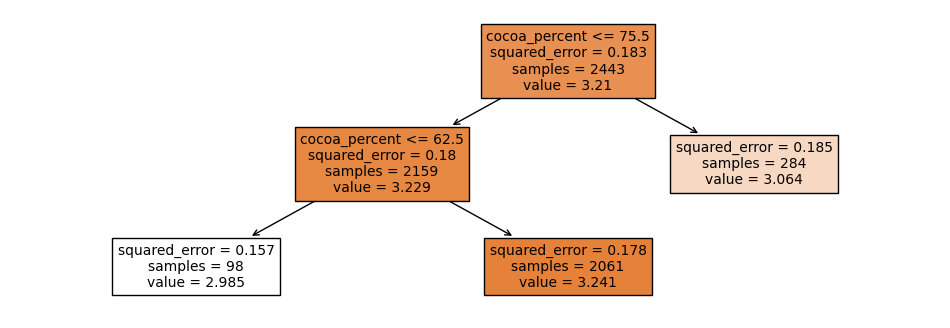

In [114]:
from sklearn.tree import plot_tree
plt.figure(figsize=[12,4])
plot_tree(arbol,filled=True,feature_names=['cocoa_percent','year_reviewed'],fontsize=10);


**Pruebo con 6 hojas o niveles:**

In [115]:
arbol=DecisionTreeRegressor(max_leaf_nodes=6)
arbol.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=6)

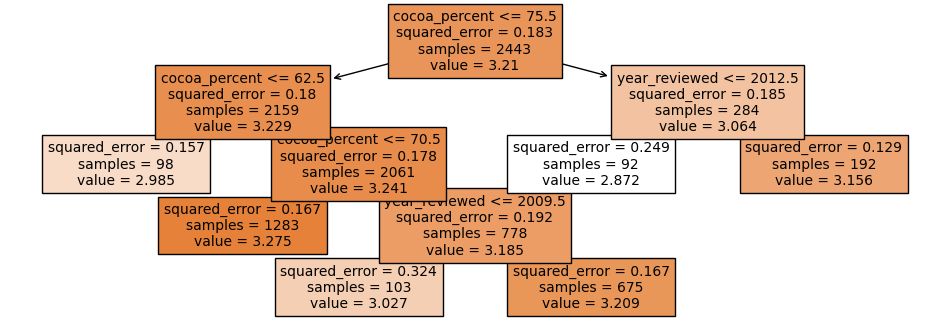

In [116]:
from sklearn.tree import plot_tree
plt.figure(figsize=[12,4])
plot_tree(arbol,filled=True,feature_names=['cocoa_percent','year_reviewed'],fontsize=10);

In [117]:
arbol.predict(X_test)

array([3.27494154, 3.15625   , 3.27494154, 3.02669903, 3.27494154,
       3.27494154, 3.27494154, 3.20888889, 3.27494154, 3.02669903,
       3.27494154, 3.27494154, 3.27494154, 3.27494154, 3.27494154,
       3.20888889, 3.27494154, 3.27494154, 3.27494154, 3.02669903,
       3.20888889, 3.15625   , 3.15625   , 3.20888889, 3.15625   ,
       3.20888889, 2.98469388, 3.27494154, 3.20888889, 3.20888889,
       3.27494154, 3.15625   , 3.20888889, 3.27494154, 3.20888889,
       3.02669903, 3.27494154, 3.15625   , 3.27494154, 3.27494154,
       3.27494154, 3.15625   , 3.20888889, 3.27494154, 3.20888889,
       3.15625   , 3.20888889, 3.20888889, 3.27494154, 2.98469388,
       3.27494154, 3.20888889, 3.27494154, 3.27494154, 3.20888889,
       3.20888889, 3.27494154, 3.27494154, 3.27494154, 3.27494154,
       3.27494154, 3.27494154, 3.15625   , 3.27494154, 3.20888889,
       2.98469388, 3.27494154, 3.20888889, 3.15625   , 3.15625   ,
       3.27494154, 3.20888889, 3.20888889, 3.20888889, 3.20888

In [118]:
import plotly.express as px
px.scatter_3d(df,y='cocoa_percent',x='year_reviewed',z='rating',color='rating')

**Ahora hago las comparaciones de los distintos modelos (el de Regresión simple del item 1 y estos dos del item 5 de Arbol de regresion con 3 y 6 niveles y tambien el árbol sin poda):**

In [119]:
y_train

2337    3.00
439     3.00
686     3.25
457     3.50
1104    3.50
        ... 
1851    2.75
2237    3.75
42      2.75
1068    3.00
699     3.00
Name: rating, Length: 1832, dtype: float64

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
modelo_lineal=LinearRegression()
modelo_lineal.fit(X_train,y_train)

LinearRegression()

In [122]:
arbol_sinpoda=DecisionTreeRegressor()
arbol_sinpoda.fit(X_train,y_train)

DecisionTreeRegressor()

In [123]:
arbol_3niveles=DecisionTreeRegressor(max_depth=3)
arbol_3niveles.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [124]:
arbol_6niveles=DecisionTreeRegressor(max_leaf_nodes=6)
arbol_6niveles.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=6)

In [125]:
from sklearn.metrics import r2_score


In [126]:
y_pred_train1=modelo_lineal.predict(X_train)
y_pred_train2=arbol_sinpoda.predict(X_train)
y_pred_train3=arbol_3niveles.predict(X_train)
y_pred_train4=arbol_6niveles.predict(X_train)

In [127]:
r2_score(y_pred_train1,y_train)

-69.76129550968804

In [128]:
r2_score(y_pred_train2,y_train)

-1.9729722981684277

In [129]:
r2_score(y_pred_train3,y_train)

-15.002937610063135

In [130]:
r2_score(y_pred_train4,y_train)

-15.444636550346221

In [131]:
from sklearn.model_selection import cross_val_score

cross_val_score(modelo_lineal, X_train, y_train,cv=3,scoring='r2').mean()

0.009070000819573468

In [132]:
cross_val_score(arbol_sinpoda, X_train, y_train).mean()

-0.15566657018301183

In [133]:
cross_val_score(arbol_3niveles, X_train, y_train).mean()

0.015479268854875628

In [134]:
cross_val_score(arbol_6niveles, X_train, y_train).mean()

0.012399882196521928

***CONCLUSIÓN DE LA PRIMERA APLICACIÓN DE ÁRBOL: EL MODELO SIN PODA ES EL QUE MEJOR PREDICE (mejor cross validation) PERO SIGUE SIENDO MUY BAJO.***

**SEGUNDO: COMO MODELO DE CLASIFICACIÓN**

In [135]:
df

,index,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,çlasificacion
0,0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,recomendado
1,1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,altamente recomendado
2,2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,altamente recomendado
3,3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,recomendado
4,4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,recomendado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75,deceptionante
2439,2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75,altamente recomendado
2440,2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00,recomendado
2441,2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25,recomendado


In [136]:
df.çlasificacion.value_counts()

recomendado              959
altamente recomendado    847
deceptionante            519
sobresaliente            111
desagradable               6
Name: çlasificacion, dtype: int64

Como me tiró un error un modelo veo si hay nulos en Clasificacion y veo que sí que hay uno, debo eliminarlo:

In [137]:
df.isnull().sum()

index               0
id                  0
manufacturer        0
company_location    0
year_reviewed       0
bean_origin         0
bar_name            0
cocoa_percent       0
num_ingredients     0
ingredients         0
review              0
rating              0
çlasificacion       1
dtype: int64

In [138]:
df.shape

(2443, 13)

In [139]:
df=df.dropna()
df=df.reset_index()
df.shape

(2442, 14)

In [140]:
df.isnull().sum()

level_0             0
index               0
id                  0
manufacturer        0
company_location    0
year_reviewed       0
bean_origin         0
bar_name            0
cocoa_percent       0
num_ingredients     0
ingredients         0
review              0
rating              0
çlasificacion       0
dtype: int64

In [141]:
X=df[['year_reviewed','cocoa_percent']]
y=df.çlasificacion

<Axes: xlabel='year_reviewed', ylabel='cocoa_percent'>

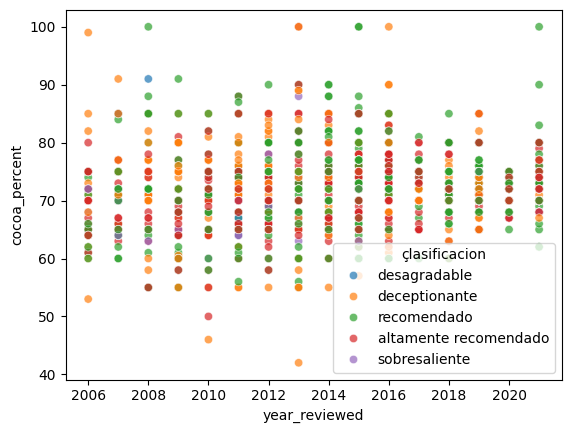

In [142]:
sns.scatterplot(df,x='year_reviewed',y='cocoa_percent',hue='çlasificacion',alpha=0.7)

In [143]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test =train_test_split(X,y)

In [144]:
arbol=DecisionTreeClassifier(max_leaf_nodes=3)
arbol.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

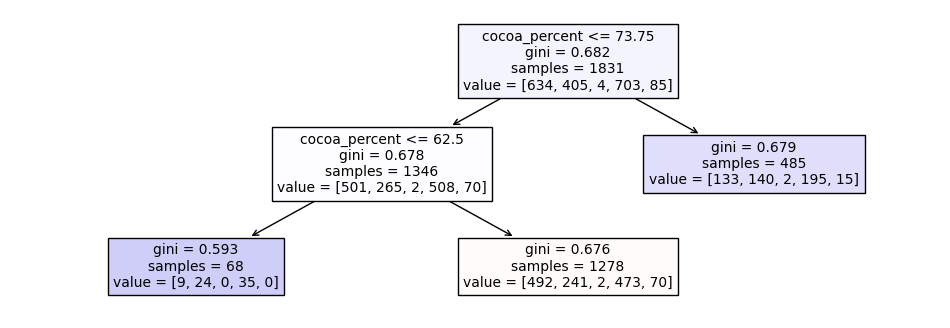

In [145]:
from sklearn.tree import plot_tree
plt.figure(figsize=[12,4])
plot_tree(arbol,filled=True,feature_names=['year_reviewed','cocoa_percent'],fontsize=10);

**Pruebo ÁRBOL SIN PODA:**

In [146]:
from sklearn.inspection import DecisionBoundaryDisplay

<Figure size 640x480 with 0 Axes>

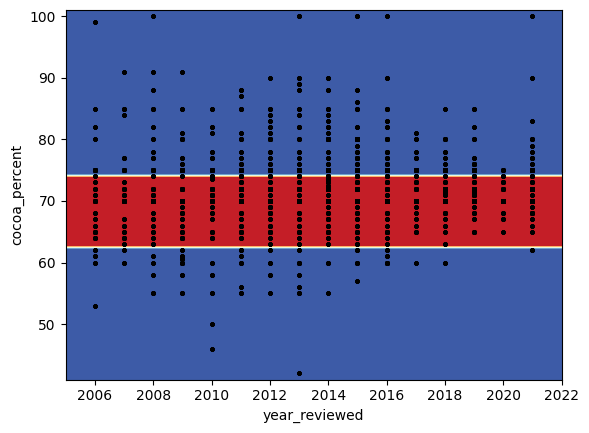

In [147]:
classes=list(y.unique())

# Plot the decision boundary
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

DecisionBoundaryDisplay.from_estimator(
    arbol,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    xlabel='year_reviewed',
    ylabel='cocoa_percent',
)

# Plot the training points
for especie in classes:
    idx = np.where(y == 'çlasificacion')
    plt.scatter(
        X['year_reviewed'],
        X['cocoa_percent'], color='black',
        s=5)



**PRUEBO CON 6 HOJAS O NIVELES:**


<Figure size 640x480 with 0 Axes>

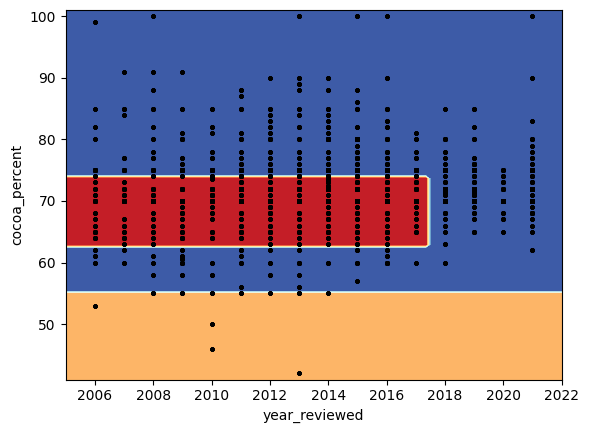

In [148]:
arbol=DecisionTreeClassifier(max_leaf_nodes=6)
arbol.fit(X_train,y_train)
classes=list(y.unique())

# Plot the decision boundary
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

DecisionBoundaryDisplay.from_estimator(
    arbol,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    xlabel='year_reviewed',
    ylabel='cocoa_percent',
)

# Plot the training points
for especie in classes:
    idx = np.where(y == 'çlasificacion')
    plt.scatter(
        X['year_reviewed'],
        X['cocoa_percent'], color='black',
        s=5)

**PRUEBO CON 8 HOJAS O NIVELES:**

<Figure size 640x480 with 0 Axes>

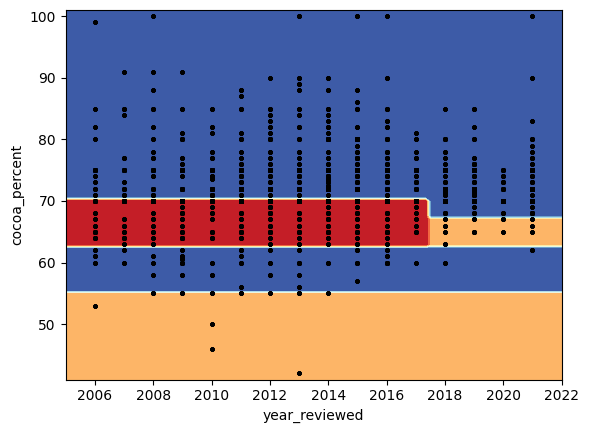

In [149]:
arbol=DecisionTreeClassifier(max_leaf_nodes=8)
arbol.fit(X_train,y_train)
classes=list(y.unique())

# Plot the decision boundary
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

DecisionBoundaryDisplay.from_estimator(
    arbol,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    xlabel='year_reviewed',
    ylabel='cocoa_percent',
)

# Plot the training points
for especie in classes:
    idx = np.where(y == 'çlasificacion')
    plt.scatter(
        X['year_reviewed'],
        X['cocoa_percent'], color='black',
        s=5)

**PRUEBO CON 30 HOJAS O NIVELES:**

<Figure size 640x480 with 0 Axes>

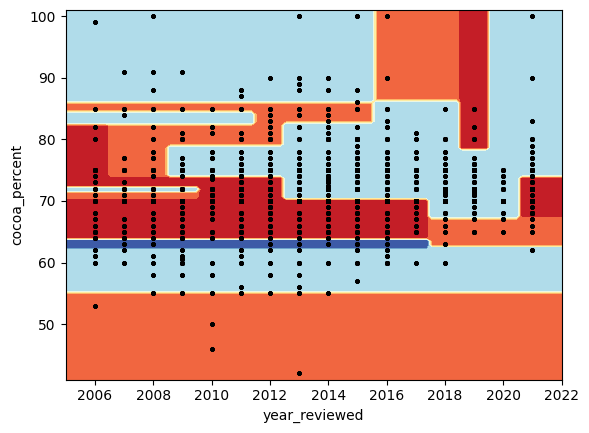

In [150]:
arbol=DecisionTreeClassifier(max_leaf_nodes=30)
arbol.fit(X_train,y_train)
classes=list(y.unique())

# Plot the decision boundary
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

DecisionBoundaryDisplay.from_estimator(
    arbol,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    xlabel='year_reviewed',
    ylabel='cocoa_percent',
)

# Plot the training points
for especie in classes:
    idx = np.where(y == 'çlasificacion')
    plt.scatter(
        X['year_reviewed'],
        X['cocoa_percent'], color='black',
        s=5)

**Ahora hago las comparaciones de los distintos modelos de Clasificación (sin poda, con 3 niveles, con 6 niveles , con 8 niveles y con 30 niveles):**

In [151]:
arbol_sinpoda=DecisionTreeClassifier()
arbol_sinpoda.fit(X_train,y_train)

DecisionTreeClassifier()

In [152]:
arbol_3niveles=DecisionTreeClassifier(max_depth=3)
arbol_3niveles.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [153]:
arbol_6niveles=DecisionTreeClassifier(max_depth=6)
arbol_6niveles.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [154]:
arbol_8niveles=DecisionTreeClassifier(max_depth=8)
arbol_8niveles.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [155]:
arbol_30niveles=DecisionTreeClassifier(max_depth=30)
arbol_30niveles.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=30)

**ACCURACY:**

In [156]:
cross_val_score(arbol_sinpoda, X_train, y_train).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.



0.37956552165691393

In [157]:
cross_val_score(arbol_3niveles, X_train, y_train).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.



0.40523220321317427

In [158]:
cross_val_score(arbol_6niveles, X_train, y_train).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.



0.3915784458242134

In [159]:
cross_val_score(arbol_8niveles, X_train, y_train).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.



0.3964994565298313

In [160]:
cross_val_score(arbol_30niveles, X_train, y_train).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.



0.3801119697443457

**RECALL:**

In [161]:
from sklearn.model_selection import cross_val_score

In [162]:
print(cross_val_score(arbol_sinpoda, X_train, y_train,cv=3,scoring='recall').mean())

nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "/usr/local/lib/python3.10/dist-packages/skle

In [163]:
cross_val_score(arbol_3niveles, X_train, y_train).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.



0.40523220321317427

In [164]:
cross_val_score(arbol_6niveles, X_train, y_train).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.



0.3915784458242134

In [165]:
cross_val_score(arbol_8niveles, X_train, y_train).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.



0.39595300844239956

In [166]:
cross_val_score(arbol_30niveles, X_train, y_train).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.



0.3795640326975477

***CONCLUSIÓN DE LA SEGUNDA APLICACIÓN DE ÁRBOL: EL MODELO CON 3 HOJAS ES EL QUE MEJOR PREDICE (mejor cross validation). Y MEJORA CONSIDERABLEMENTE CON RESPECTO A LA APLICAIÓN DE ESTE METODO TOMANDO EL MODELO COMO REGRESIÓN LINEAL. ES DECIR EN LA SEGUNDA PRUEBA DONDE SE TOMÓ EL MODELO COMO CLASIFICACIÓN Y SE PREDIJO CON ÁRBOL DE DECISIÓN DE 3 NIVELES ES CUANDO MEJOR PERFORMÓ. ***


---


**MÉTRICAS DE CLASIFICACIÓN**


---



**EVALÚO EL MODELO DE CLASIFICACIÓN, ELIGIENDO UNA VARIABLE PARA PODER REALIZAR LA MATRIZ DE CONFUSIÓN:**

In [167]:
df

,level_0,index,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,çlasificacion
0,0,0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,recomendado
1,1,1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,altamente recomendado
2,2,2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,altamente recomendado
3,3,3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,recomendado
4,4,4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,recomendado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,2438,2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75,deceptionante
2438,2439,2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75,altamente recomendado
2439,2440,2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00,recomendado
2440,2441,2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25,recomendado


In [168]:
df=df.drop(['level_0', 'index', 'id'],axis=1)

In [169]:
df

,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,çlasificacion
0,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,recomendado
1,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,altamente recomendado
2,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,altamente recomendado
3,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,recomendado
4,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,recomendado
...,...,...,...,...,...,...,...,...,...,...,...
2437,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75,deceptionante
2438,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75,altamente recomendado
2439,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00,recomendado
2440,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25,recomendado


In [170]:
df=pd.get_dummies(df)

In [171]:
df

,year_reviewed,cocoa_percent,num_ingredients,rating,manufacturer_5150,manufacturer_A. Morin,manufacturer_AMMA,manufacturer_Acalli,manufacturer_Adi aka Fijiana (Easy In Ltd),manufacturer_Aelan,...,"review_woody, spicy, tobacco","review_woody, sweet, unrefined","review_woody, toast, pepper",review_yellow fruit,"review_yogurt, lemon, licorice",çlasificacion_desagradable,çlasificacion_deceptionante,çlasificacion_recomendado,çlasificacion_altamente recomendado,çlasificacion_sobresaliente
0,2019,76.0,3.0,3.25,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2019,76.0,3.0,3.50,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2019,76.0,3.0,3.75,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2021,68.0,3.0,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2021,72.0,3.0,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,2014,80.0,4.0,2.75,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2438,2017,75.0,3.0,3.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2439,2018,75.0,3.0,3.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2440,2018,70.0,3.0,3.25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0



**Elijo la variable "SOBRESALIENTE" y la evalúo:**

In [172]:
X=df.drop('çlasificacion_sobresaliente',axis=1)

In [173]:
y=df.çlasificacion_sobresaliente

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

# PRIMERO VEO RECALL

In [176]:
from sklearn.metrics import recall_score

In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
from sklearn.neighbors import KNeighborsClassifier

In [179]:
from sklearn.naive_bayes import GaussianNB

In [180]:
from sklearn.tree import DecisionTreeClassifier

In [181]:
#model1=LogisticRegression()

In [182]:
model2=KNeighborsClassifier(3)

In [183]:
model3=KNeighborsClassifier(5)

In [184]:
model4=GaussianNB()

In [185]:
model5=DecisionTreeClassifier(max_leaf_nodes=3)

In [186]:
from sklearn.model_selection import cross_val_score

In [187]:
#print(cross_val_score(model1, X_train, y_train, cv=3, scoring='recall').mean())
print(cross_val_score(model2, X_train, y_train, cv=3, scoring='recall').mean())
print(cross_val_score(model3, X_train, y_train, cv=3, scoring='recall').mean())
print(cross_val_score(model4, X_train, y_train, cv=3, scoring='recall').mean())
print(cross_val_score(model5, X_train, y_train, cv=3, scoring='recall').mean())


0.19581280788177338
0.023399014778325122
0.4310344827586207
1.0


# SEGUNDO VEO ACCURACY

In [188]:
#print(cross_val_score(model1, X_train, y_train, cv=3).mean())
print(cross_val_score(model2, X_train, y_train, cv=3).mean())
print(cross_val_score(model3, X_train, y_train, cv=3).mean())
print(cross_val_score(model4, X_train, y_train, cv=3).mean())
print(cross_val_score(model5, X_train, y_train, cv=3).mean())


0.958490515414129
0.9519393988176686
0.9732428250740074
1.0


In [189]:
#modelo ganador model5

In [190]:
model5.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

In [191]:
# evaluacion final del modelo:

In [192]:
y_pred=model5.predict(X_test)

In [193]:
recall_score(y_test,y_pred)

1.0

**MATRIZ DE CONFUSIÓN:**

In [194]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


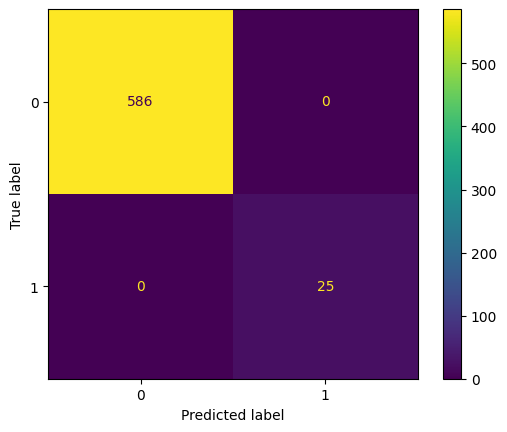

In [195]:
cm = confusion_matrix(y_test, y_pred, labels=model5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=model5.classes_)
disp.plot()


**CONCLUSIÓN: EN LA MATRIZ DE CONFUSIÓN LOGRÉ MINIMIZAR LOS FALSOS NEGATIVOS (RECALL) CON EL MODELO 5.**

---

**6- Aplico Random Forest:**


---

In [196]:
# librerias
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [197]:
df['çlasificacion']=pd.cut(df.rating, [1.0, 1.9, 2.9, 3.49, 3.9,5],labels=['desagradable','deceptionante','recomendado','altamente recomendado','sobresaliente'])

In [198]:
df

,year_reviewed,cocoa_percent,num_ingredients,rating,manufacturer_5150,manufacturer_A. Morin,manufacturer_AMMA,manufacturer_Acalli,manufacturer_Adi aka Fijiana (Easy In Ltd),manufacturer_Aelan,...,"review_woody, sweet, unrefined","review_woody, toast, pepper",review_yellow fruit,"review_yogurt, lemon, licorice",çlasificacion_desagradable,çlasificacion_deceptionante,çlasificacion_recomendado,çlasificacion_altamente recomendado,çlasificacion_sobresaliente,çlasificacion
0,2019,76.0,3.0,3.25,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,recomendado
1,2019,76.0,3.0,3.50,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,altamente recomendado
2,2019,76.0,3.0,3.75,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,altamente recomendado
3,2021,68.0,3.0,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,recomendado
4,2021,72.0,3.0,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,recomendado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,2014,80.0,4.0,2.75,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,deceptionante
2438,2017,75.0,3.0,3.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,altamente recomendado
2439,2018,75.0,3.0,3.00,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,recomendado
2440,2018,70.0,3.0,3.25,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,recomendado


In [199]:
X=df[['year_reviewed','cocoa_percent']]
y=df.çlasificacion

In [200]:
# crear el procedimiento
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


In [201]:
skf.split(X,y)


<generator object _BaseKFold.split at 0x7ecc3a1a31b0>

In [202]:
X

,year_reviewed,cocoa_percent
0,2019,76.0
1,2019,76.0
2,2019,76.0
3,2021,68.0
4,2021,72.0
...,...,...
2437,2014,80.0
2438,2017,75.0
2439,2018,75.0
2440,2018,70.0


In [203]:
y

0                 recomendado
1       altamente recomendado
2       altamente recomendado
3                 recomendado
4                 recomendado
                ...          
2437            deceptionante
2438    altamente recomendado
2439              recomendado
2440              recomendado
2441    altamente recomendado
Name: çlasificacion, Length: 2442, dtype: category
Categories (5, object): ['desagradable' < 'deceptionante' < 'recomendado' < 'altamente recomendado' <
                         'sobresaliente']

In [204]:
modelo = RandomForestClassifier(random_state=1,n_estimators=30,max_depth=4)
modelo2 = RandomForestClassifier(random_state=1,n_estimators=30,max_depth=6)
modelo3 = RandomForestClassifier(random_state=1,n_estimators=30,max_depth=7)
modelo4 = RandomForestClassifier(random_state=1,n_estimators=30,max_depth=8)
modelo5 = RandomForestClassifier(random_state=1,n_estimators=30,max_depth=9)
modelo6 = RandomForestClassifier(random_state=1,n_estimators=30,max_depth=10)


In [205]:
from sklearn.model_selection import cross_val_score

In [206]:
cross_val_score(modelo,X,y,cv=skf).mean()

0.4152360119346944

In [207]:
cross_val_score(modelo2,X,y,cv=skf).mean()

0.4058282208588957

In [208]:
from sklearn.model_selection import KFold


In [209]:
cv5 = KFold(n_splits=5, random_state=42, shuffle=True)


In [210]:
cross_val_score(modelo,X,y,cv=cv5).mean()

0.4066504073217339

In [211]:
cross_val_score(modelo2,X,y,cv=cv5).mean()

0.4091002044989775

In [212]:
cross_val_score(modelo3,X,y,cv=cv5).mean()

0.40746086023668243

In [213]:
cross_val_score(modelo4,X,y,cv=cv5).mean()

0.40542341345670324

In [214]:
cross_val_score(modelo5,X,y,cv=cv5).mean()

0.4074684032317544

In [215]:
cross_val_score(modelo6,X,y,cv=cv5).mean()

0.4046062556572463

**CONCLUSION FINAL:**


**EL MODELO GANADOR CON MEJORES MÉTRICAS ES:model5=DecisionTreeClassifier(max_leaf_nodes=3)**
Este modelo tien un valor de Recall de 1, lo que significa que el 100% de valores positivos fueron clasificados correctamente, tambien tiene un Accuracy de 1 lo que significa que el 100% de predicciones del modelo fueron realizada de manera correcta.